<a href="https://colab.research.google.com/github/Tarunno360/Numerical-Methods/blob/main/Test_your_self_in_repo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [ ]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

2.0 + 1.0·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵


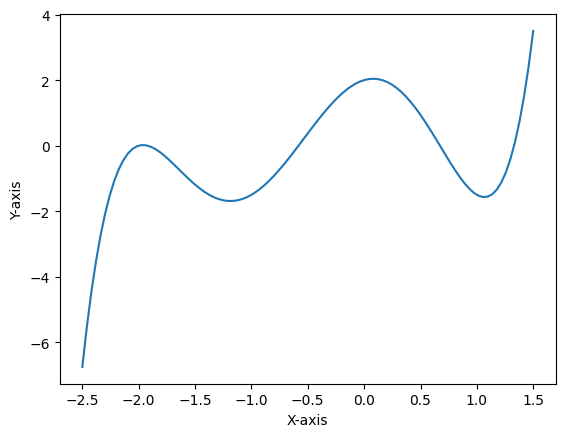

In [ ]:
#1.a This cell should plot a graph. You must use polynomial class.
P=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5 ,1])
print(P)
x_arr = np.linspace(-2.5, 1.5, 100)
p_x_arr = P(x_arr)
plt.plot(x_arr, p_x_arr)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

f'(x) is 1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴
Actual slope of f(x) where x=0 is 1.0
Actual slope of f(x) where x=-1.18625 is -9.340808105218201e-06
Plot is here


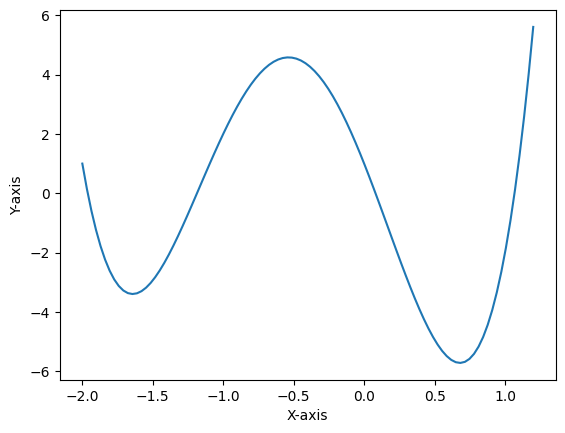

In [ ]:
#1.b This cell should print and plot a graph.
P_prime=P.deriv(1)
slope_0=P_prime(0)
print(f"f'(x) is {P_prime}")
print(f'Actual slope of f(x) where x=0 is {slope_0}')
slope_neg=P_prime(-1.18625)
print(f'Actual slope of f(x) where x=-1.18625 is {slope_neg}')
x_arr2 = np.linspace(-2, 1.2 , 100)
p_x_arr2 = P_prime(x_arr2)
plt.plot(x_arr2, p_x_arr2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
print('Plot is here')
plt.show()

In [ ]:
#1.c This cell should print
#forward
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h
x_0f=forward_diff(P,0.1,0)
print(f'Slope for x=0 is {x_0f}')
x_1f=forward_diff(P,0.1,-1.18625)
print(f'Slope for x=-1.18625 is {x_1f}')

Slope for x=0 is 0.3826000000000018
Slope for x=-1.18625 is 0.5520088838012782


In [ ]:
#1.d This cell should print
#backward
def backward_diff(f, h, x):
    return ((f(x) - f(x-h))) / h
x_0b=backward_diff(P,0.1,0)
print(f'Slope for x=0 is {x_0b}')
x_1b=backward_diff(P,0.1,-1.18625)
print(f'Slope for x=-1.18625 is {x_1b}')

Slope for x=0 is 1.5776000000000012
Slope for x=-1.18625 is -0.5476397529174859


In [ ]:
#1.e This cell should print
#central
def central_diff(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)
x_0c=central_diff(P,0.1,0)
print(f'Slope for x=0 is {x_0c}')
x_0c=central_diff(P,0.1,-1.18625)
print(f'Slope for x=-1.18625 is {x_0c}')

Slope for x=0 is 0.9801000000000015
Slope for x=-1.18625 is 0.002184565441896158


In [ ]:
#1.f This cell should show a table
def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}     #
    #Write code here
    for i in x:
      actual = f_prime(i)
      fd = forward_diff(f, h, i)
      bd = backward_diff(f, h, i)
      cd = central_diff(f, h, i)
      fd_error = abs(fd - actual)
      bd_error = abs(bd - actual)
      cd_error = abs(cd - actual)
      Result['x'].append(i)
      Result['Actual'].append(actual)
      Result['FD'].append(fd)
      Result['BD'].append(bd)
      Result['CD'].append(cd)
      Result['FD Error'].append(fd_error)
      Result['BD Error'].append(bd_error)
      Result['CD Error'].append(cd_error)
    return pd.DataFrame(Result)
compare(P,P_prime,0.1, [0,-1.18625])

,x,Actual,FD,BD,CD,FD Error,BD Error,CD Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.617400,0.57760,0.019900
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,0.552018,0.54763,0.002194


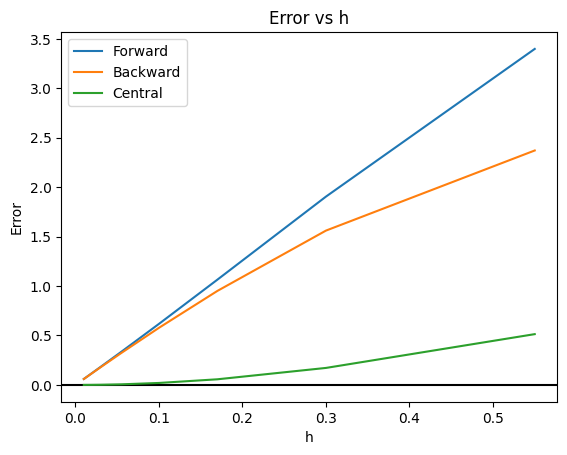

In [ ]:
#1g This cell should plot a graph.
def error_1(f, f_prime, h, x):
    Y_correct = f_prime(x)
    f_error = np.array([])
    b_error = np.array([])
    c_error = np.array([])
    for h_i in h:
        f_error_h_i = abs(forward_diff(f, h_i, x) - Y_correct)
        f_error = np.append(f_error, f_error_h_i)
        b_error_h_i = abs(backward_diff(f,h_i,x) - Y_correct)
        b_error = np.append(b_error,b_error_h_i)
        c_error_h_i = abs(central_diff(f, h_i, x) - Y_correct)
        c_error = np.append(c_error, c_error_h_i)
    return f_error, b_error, c_error
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')
hs = np.array([0.55,0.3,.17,0.1,0.055,0.03,0.017,0.01])
err = error_1(P, P_prime, hs, 0)
bx.plot(hs, err[0], label='Forward')
bx.plot(hs, err[1], label='Backward')
bx.plot(hs, err[2], label='Central')
bx.set_xlabel('h')
bx.set_ylabel('Error')
bx.set_title('Error vs h')
bx.legend()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [ ]:
#2a. This cell should not have any output.
Proposed_Method_Name = "Richardson extrapolation"
#Write Code here
def dh(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)
def dh1(f, h, x):
    return (4 * dh(f, h/2, x) - dh(f, h, x)) / 3

In [ ]:
#2b. This cell should print
p=Polynomial([2,1,-6,-2,2.5,1])
p_prime=p.deriv(1)
rich_x0=dh1(p,0.1,0)
print(f'Slope for x=0 is {rich_x0}')
rich_x1=dh1(p,0.1,-1.18625)
print(f'Slope for x=-1.18625 is {rich_x1}')

Slope for x=0 is 0.9999750000000011
Slope for x=-1.18625 is -3.4340808106048115e-05


In [ ]:
#2c.This cell should print

def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    #Write code here
    for i in x:
      actual = f_prime(i)
      fd = forward_diff(f, h, i)
      bd = backward_diff(f, h, i)
      cd = central_diff(f, h, i)
      fd_error = abs(fd - actual)
      bd_error = abs(bd - actual)
      cd_error = abs(cd - actual)
      richardson = dh1(f, h, i)
      re_error = abs(richardson - actual)
      Result['x'].append(i)
      Result['Actual'].append(actual)
      Result['FD'].append(fd)
      Result['BD'].append(bd)
      Result['CD'].append(cd)
      Result['FD Error'].append(fd_error)
      Result['BD Error'].append(bd_error)
      Result['CD Error'].append(cd_error)
      Result['RE'].append(richardson)
      Result['RE Error'].append(re_error)
    return pd.DataFrame(Result)
compare1(p,p_prime,0.1,[0,-1.18625])

,x,Actual,FD,BD,CD,RE,FD Error,BD Error,CD Error,RE Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.999975,0.617400,0.57760,0.019900,0.000025
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,-0.000034,0.552018,0.54763,0.002194,0.000025


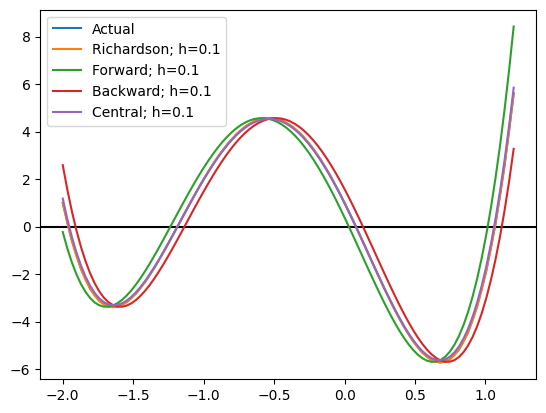

In [ ]:
#2.d This cell should plot a graph.
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
h=0.1
x1=np.linspace(-2,1.2,50,endpoint=True)
y1=p_prime(x1)
ax.plot(x1,y1,label='Actual')
x2 = np.linspace(-2, 1.2, 100, endpoint=True)
y2 = dh1(p, h, x2)
ax.plot(x2, y2, label='Richardson; h=0.1')
x3= np.linspace(-2, 1.2, 100, endpoint=True)
y3 = forward_diff(p, h, x3)
ax.plot(x3, y3, label='Forward; h=0.1')
x4= np.linspace(-2, 1.2, 100, endpoint=True)
y4 = backward_diff(p, h, x4)
ax.plot(x4, y4, label='Backward; h=0.1')
x5= np.linspace(-2, 1.2, 100, endpoint=True)
y5 = central_diff(p, h, x5)
ax.plot(x5, y5, label='Central; h=0.1')
ax.legend()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [ ]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question
f_x=Polynomial([-10,-9.5,2,-1/13])
def root_exists(f_x,intervals):
    results = {}
    for (a, b) in intervals:
        f_a = f_x(a)
        f_b = f_x(b)
        if f_a * f_b < 0:
            results[(a, b)] = "Root exists"
        else:
            results[(a, b)] = "No root exists"
    return (results)
root_exists(f_x,intervals)

{(-20, -10): 'No root exists',
 (-10, 0): 'Root exists',
 (0, 10): 'Root exists',
 (10, 20): 'Root exists',
 (20, 30): 'No root exists'}

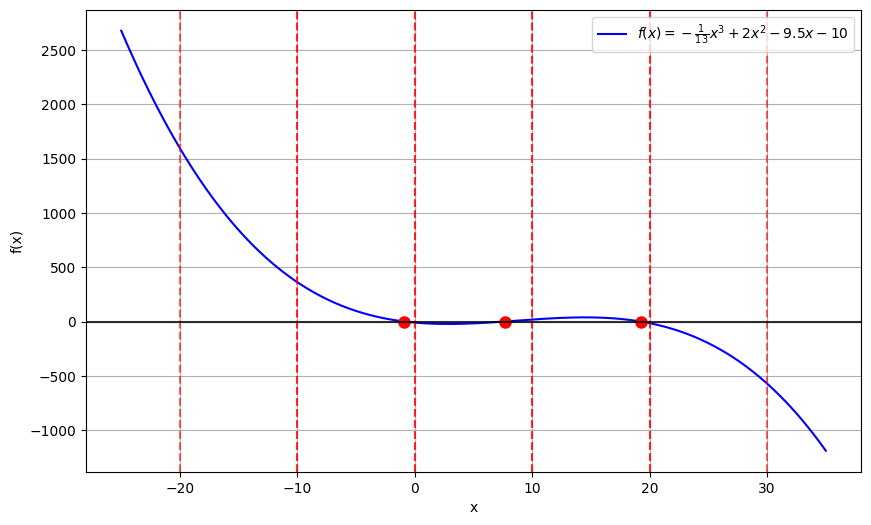

In [ ]:
#3a_ii This cell should plot a graph.
intervals = [(-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30)]
x_values = np.linspace(-25, 35, 500)
y_values = f_x(x_values)
plt.figure(figsize=(10, 6))
# Plot the function f(x)
plt.plot(x_values, y_values, label=r'$f(x) = -\frac{1}{13}x^3 + 2x^2 - 9.5x - 10$', color='b')
for interval in intervals:
    x1, x2 = interval
    plt.axvline(x=x1, color='r', linestyle='--', alpha=0.6)
    plt.axvline(x=x2, color='r', linestyle='--', alpha=0.6)
    for root in f_x.roots():
        if x1 <= root <= x2:
            plt.plot(root, 0, 'ro', markersize=8)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.8)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [ ]:
#3b This cell should print
def bisection_method(f, a, b, epsilon=1e-6, max_iterations=1000):
    if f(a) * f(b) >= 0:
        return None, "No root in this interval"
    for _ in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < epsilon:
            return c, "Root found"
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return None, "Exceeded max iterations"
intervals = [(-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30)]
root_results = {}
for interval in intervals:
    a, b = interval
    root, status = bisection_method(f_x, a, b)
    root_results[interval] = (root, status)
print(root_results)

{(-20, -10): (None, 'No root in this interval'), (-10, 0): (-0.8829367160797119, 'Root found'), (0, 10): (7.658982574939728, 'Root found'), (10, 20): (19.223954007029533, 'Root found'), (20, 30): (None, 'No root in this interval')}


c. Plot the f(x) along with the roots to check if your method is working correctly.

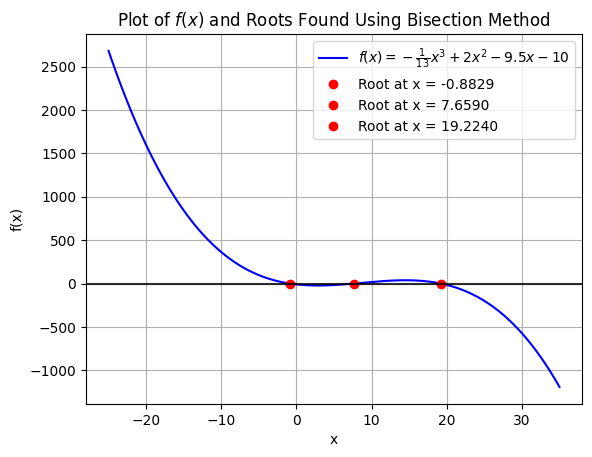

In [ ]:
#3c This cell plot a graph.
plt.plot(x_values, y_values, label=r'$f(x) = -\frac{1}{13}x^3 + 2x^2 - 9.5x - 10$', color='b')
for interval, result in root_results.items():
    if result and result[1] == "Root found":
        root = result[0]
        plt.plot(root, f_x(root), 'ro', label=f'Root at x = {root:.4f}')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.8)
plt.title("Plot of $f(x)$ and Roots Found Using Bisection Method")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [ ]:
#4a This cell should print
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
print(f.roots())

[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


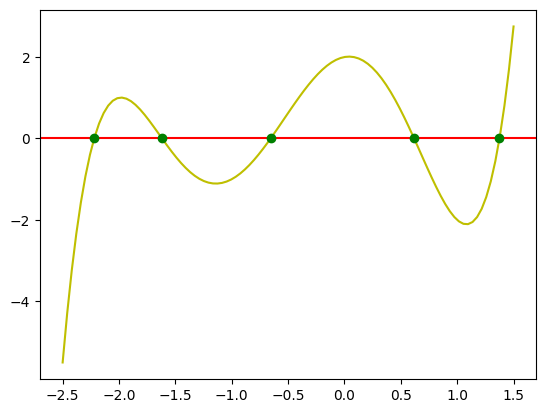

In [ ]:
#4b This cell should print plot a graph
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*5, 'go')
print(f.roots())

In [ ]:
#4c This cell should print
g1_x=Polynomial([-1,0,3,1,-1.25,-.5])
print(g1_x)
prime_g1_x=g1_x.deriv(1)
print(prime_g1_x)
lemda=abs(prime_g1_x(f.roots()))
print(f'Lemda is {lemda}')

-1.0 + 0.0·x + 3.0·x² + 1.0·x³ - 1.25·x⁴ - 0.5·x⁵
0.0 + 6.0·x + 3.0·x² - 5.0·x³ - 2.5·x⁴
Lemda is [4.56014791 2.19098301 1.69803704 3.30901699 8.02306505]


In [ ]:
#4d This cell should print
result=[]
value=[]
for l in lemda:
  if abs(l)>1:
    result.append('Divergent')
    value.append(abs(l))
  else:
    result.append('Convergent')
    value.append(abs(l))
pd.DataFrame({'Lemda':value,'Result':result})
# All the result is divergent so PROVED

,Lemda,Result
0,4.560148,Divergent
1,2.190983,Divergent
2,1.698037,Divergent
3,3.309017,Divergent
4,8.023065,Divergent


In [ ]:
#4e This cell have no outputs
def g2(x):
    p = Polynomial([2.0, .5, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/6)
def g3(x):
    p = Polynomial([-2.0, -.5, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)
def g4(x):
    p=Polynomial([-2,-0.5,6,2,-2.5])
    return np.power(p(x),1.0/5.0)
def g5(x):
    p=Polynomial([2.0,0.5,-3,-2,2.5,1.0])
    return np.power(p(x)/3,1.0/2.0)

In [ ]:
#4f This cell should print
a2 = 0.80
g2_a = []
a3 = 0.80
g3_a = []
a4 = 0.80
g4_a = []
a5 = 0.80
g5_a = []
for i in range(21):
  p = g2(a2)
  g2_a.append(p)
  a2= p
  q = g3(a3)
  g3_a.append(q)
  a3= q
  r = g4(a3)
  g4_a.append(r)
  a4= r
  s = g5(a5)
  g5_a.append(s)
  a5= s
print(pd.DataFrame({'g2(x)':g2_a, 'g3(x)':g3_a, 'g4(x))': g4_a,'g5(x)':g5_a}))
g2_root = g2_a[-1]
g3_root = g3_a[-1]
g4_root = g4_a[-1]
g5_root = g5_a[-1]
print(f'Roots are {g2_root}, {g3_root}, {g4_root}, {g5_root}')

       g2(x)     g3(x)    g4(x))     g5(x)
0   0.674250  0.961461  1.220383  0.518871
1   0.629830  1.126203  1.311631  0.680976
2   0.620179  1.249411  1.353959  0.577863
3   0.618412  1.320336  1.368817  0.644057
4   0.618100  1.353509  1.373265  0.601184
5   0.618046  1.367069  1.374600  0.628983
6   0.618036  1.372244  1.375034  0.610925
7   0.618034  1.374162  1.375184  0.622654
8   0.618034  1.374865  1.375237  0.615032
9   0.618034  1.375121  1.375257  0.619985
10  0.618034  1.375214  1.375264  0.616766
11  0.618034  1.375248  1.375266  0.618858
12  0.618034  1.375261  1.375267  0.617499
13  0.618034  1.375265  1.375267  0.618382
14  0.618034  1.375267  1.375268  0.617808
15  0.618034  1.375267  1.375268  0.618181
16  0.618034  1.375267  1.375268  0.617938
17  0.618034  1.375268  1.375268  0.618096
18  0.618034  1.375268  1.375268  0.617994
19  0.618034  1.375268  1.375268  0.618060
20  0.618034  1.375268  1.375268  0.618017
Roots are 0.6180339887498949, 1.3752676085689226, 1.37

<ipython-input-166-3d53face2437>:7: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)
<ipython-input-166-3d53face2437>:10: RuntimeWarning: invalid value encountered in power
  return np.power(p(x),1.0/5.0)


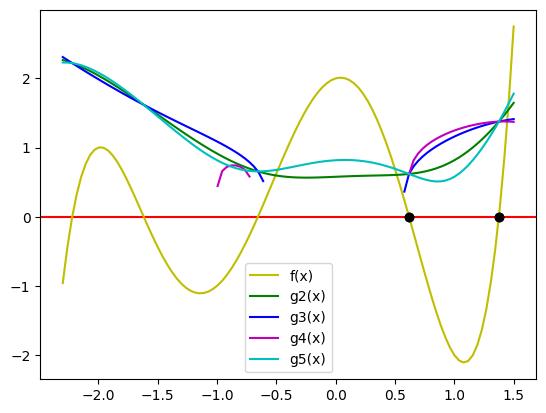

In [ ]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
xs = np.linspace(-2.3, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g2(xs), label='g2(x)', color='g')
plt.plot(xs, g3(xs), label='g3(x)', color ='b')
plt.plot(xs, g4(xs), label='g4(x)', color = 'm' )
plt.plot(xs, g5(xs), label='g5(x)', color = 'c')
plt.legend()
if len(g2_a) > 0:
    root = np.array([g2_a[len(g2_a)-1], g3_a[len(g3_a)-1], g4_a[len(g4_a)-1],g5_a[len(g5_a)-1]])
    plt.plot(root, f(root), 'ko')